***
<br><br>

Étudiants assignés : Abbassi Yassir ; L. Hajar<br>
Date de présentation : February 04, 2022<br>

Professeur : Sidi Mohamed L. B. C.
<br><br><p style="text-align: center;"><b>Groupe 8: Analyse du Futures Gold Feb 22 (GC=F) sous Python</b></p>

***

##### Importation des dépendances & données

Pour mettre en œuvre cette étude, nous avons fait usage aux différents modules python présentés comme suit : 
* Pandas : est une bibliothèque écrite pour le langage de programmation python permettant la manipulation et l’analyse des données. 
* Numpy : est une extension du langage de programmation python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux. 
* Mathplotlib : est une bibliothèque du langage de programmation python destinée à tracer et visualiser des données sous formes de graphiques.
* Scipy : est un projet visant à unifier et fédérer un ensemble de bibliothèque python à usage scientifique. Scipy utilise les tableaux et matrices du module Numpy. 
* Datetime : le module datetime fournit des classes permettant de manipuler les dates et les heures.
* Yfinance : un package Python très facile à utiliser pour récupérer des données financières de Yahoo Finance.
* Math : Ce module fournit l'accès aux fonctions mathématiques définies.
* Statsmodels.tsa.stattools:statsmodels.tsa : contient des classes de modèles et des fonctions utiles pour l'analyse de séries chronologiques. Les modèles de base comprennent les modèles autorégressifs univariés (AR), les modèles autorégressifs vectoriels (VAR) et les modèles de moyenne mobile autorégressifs univariés (ARMA).
* statsmodels.graphics.tsaplots.
* statsmodels.api : pour réaliser les régressions et les contrôler
* Pmdarima (à l'origine pyramid-arima, pour l'anagramme de 'py' + 'arima') : est une bibliothèque statistique conçue pour combler le vide dans les capacités d'analyse de séries chronologiques de Python.

In [1]:
#0.a Importing the libraries:
from numpy import log
import numpy as np
from datetime import datetime, date
import yfinance as yf

import pandas as pd
import math

import matplotlib.pyplot as plt

#---------------------------------------------------------------------------------
from statsmodels.tsa.stattools import adfuller,acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
#---------------------------------------------------------------------------------
#0.b Importing data
RISKY_ASSET = 'GC=F'
START_DATE  = '2019-01-01'
END_DATE    = '2022-01-21'

gc_f = yf.download(RISKY_ASSET, start=START_DATE,end=END_DATE, adjusted=True)
gc_f.to_csv('iGC_F.csv',index=True)
#gc_f

idf = pd.read_csv('iGC_F.csv', parse_dates=['Date'], index_col='Date').asfreq(freq='W', method='backfill')
df = idf["Adj Close"]

[*********************100%***********************]  1 of 1 completed


Pour l'importation des données ($GC=F$), on a premièrement télécharger les données de date $2019/01/01$ jusqu'à la date $2022/01/21$ de Yahoo finance. Puis on a défini comme indexe la variable date et comme fréquence (week) pour visualiser d'une manière claire nos plots ainsi on a utilisé la méthode backfill pour remplir les valeurs manquantes comme les weekends et les vacances.

### 1. Présentation de la série : Graphique, Autocorrélations simples et partielles,...

<AxesSubplot:title={'center':'Gold Feb 22 (GC=F) Futures : 2019-01-01 to 2022-01-21'}, xlabel='Date'>

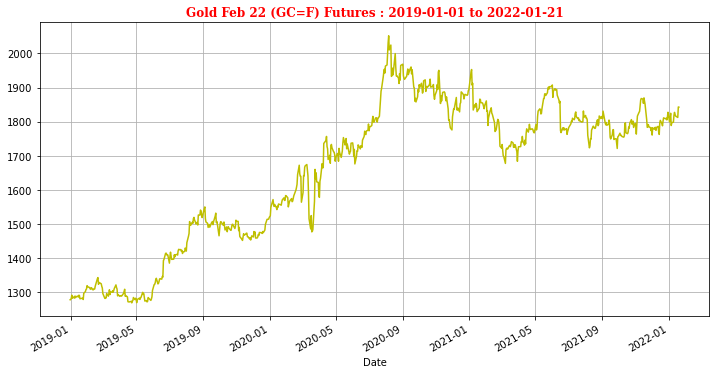

In [2]:
plt.title(f'Gold Feb 22 (GC=F) Futures : {START_DATE} to {END_DATE}', 
          fontdict={'family': 'serif', 
                    'color' : 'r',
                    'weight': 'bold',
                    'size': 12})
gc_f["Adj Close"].plot(figsize=(12,6),grid=True,color='y')

Le graphique représente le cours de l'action de l'or du 2019-01-01 au 2022-01-21. Au cours de 3 ans, le cours global des actions a augmenté avec des fortes fluctuations. En observant les valeurs de la série chronologique, on constate :
- Une tendance croissante au cours de temps.
- Elles ne fluctuent pas autour d'une valeur moyenne stable.
- L'amplitude moyenne de ses fluctuations varie.

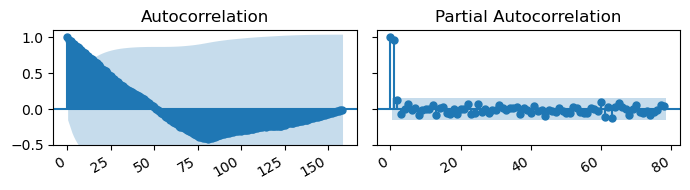

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(7,2), dpi= 100, sharey = True)
plot_acf(df.dropna(), ax=axes[0], lags=158, alpha=0.05)
plot_pacf(df.dropna(), ax=axes[1], lags=78, alpha=0.05, method='ywm')

axes[0].set(ylim=(-0.5,1.1))
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

- L'autocorrélogramme met en évidence une corrélation stable entre les valeurs de la date $X_{t+lag}$ et les valeurs des dates précédentes $(X_{t+lag-1}, X_{t+lag-2},...,X_{t})$. Les valeurs de corrélation fluctuent autour le voisinage de $0$ tout au long de l'intervalle de dates de décalage.
- Le graphique d'autocorrélation partielle indique une très faible corrèlation partielle entre $X_{t+lag}$ et $X_{t}$.

### 2. Décomposition de la série chronologique
#### A. Modèle additive & Modèle multiplicative

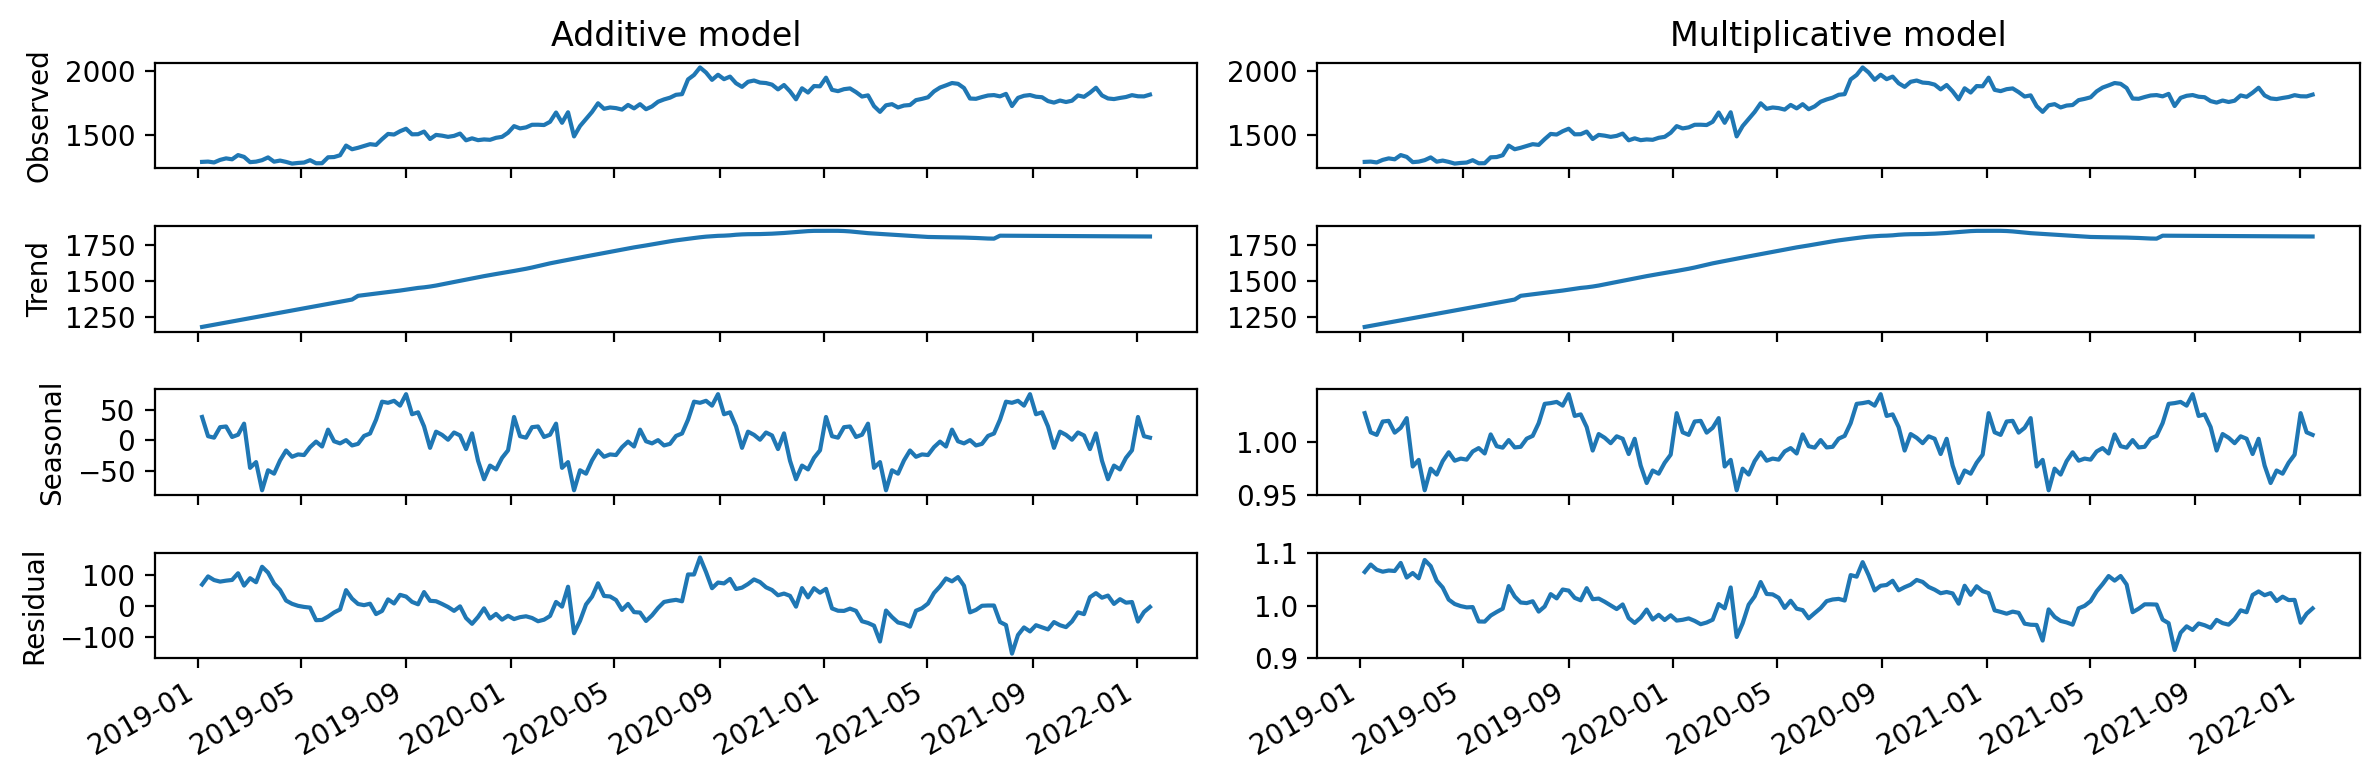

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
model_add = seasonal_decompose(idf['Close'], model='additive', extrapolate_trend='freq')
# Multiplicative Decomposition
model_mul = seasonal_decompose(idf['Close'], model='multiplicative', extrapolate_trend='freq')
#--------------------------------------------------------------------------------------------------
observed = pd.DataFrame({'Additive': model_add.observed,'Multiplicative': model_mul.observed})
trend = pd.DataFrame({'Additive': model_add.trend,'Multiplicative': model_mul.trend})
seasonal = pd.DataFrame({'Additive': model_add.seasonal,'Multiplicative': model_mul.seasonal})
residual = pd.DataFrame({'Additive': model_add.resid,'Multiplicative': model_mul.resid})
#--------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(4, 2, figsize=(12,4), dpi= 200, sharex= True)
axes[0,0].plot(observed['Additive'])
axes[0,1].plot(observed['Multiplicative'])
axes[1,0].plot(trend['Additive'])
axes[1,1].plot(trend['Multiplicative'])
axes[2,0].plot(seasonal['Additive'])
axes[2,1].plot(seasonal['Multiplicative'])
axes[3,0].plot(residual['Additive'])
axes[3,1].plot(residual['Multiplicative'])

axes[0,0].set_title('Additive model')
axes[0,1].set_title('Multiplicative model')

plt.setp(axes[0, 0], ylabel='Observed')
plt.setp(axes[1, 0], ylabel='Trend')
plt.setp(axes[2, 0], ylabel='Seasonal')
plt.setp(axes[3, 0], ylabel='Residual')

axes[3,1].set(ylim=(0.9,1.1))

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

#### B.Construction d'une nouvelle série temporelle

In [5]:
df_reconstructed = pd.concat([model_add.seasonal, model_add.trend, model_add.resid, model_add.observed], axis=1)
df_reconstructed.columns = ['season', 'trend', 'residuals', 'actual_values']
df = df_reconstructed['actual_values']

### 3. Étude de la non stationnarité de la série (sa présence, sa nature à l’aide de la méthode heuristique et des tests de non stationnarité de Dickey et Fuller)

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.636590293567307
p-value: 0.46404301337715775
Critial Values:
   1%, -3.472703119504854
Critial Values:
   5%, -2.880131672353732
Critial Values:
   10%, -2.5766826861130268


p-value > 0.95. On considére H0, donc la série est non stationnaire.

### 4. Trouver l’ordre de différenciation (d) dans le modèle ARIMA

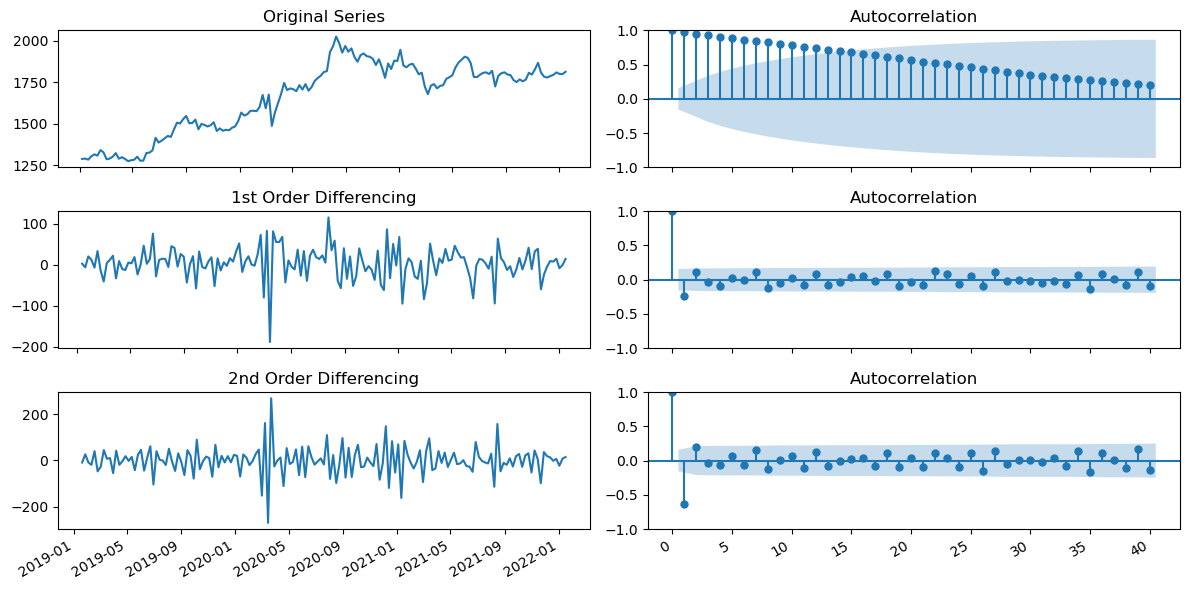

In [7]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(12,6), dpi=100)
axes[0,0].plot(df); axes[0,0].set_title('Original Series')
plot_acf(df, ax=axes[0,1], lags=40, alpha=0.05)

# 1st Differencing
axes[1,0].plot(df.diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1,1], lags=40, alpha=0.05)

# 2nd Differencing
axes[2,0].plot(df.diff().diff());axes[2,0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2,1], lags=40, alpha=0.05)

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

In [8]:
from pmdarima.arima.utils import ndiffs
d = ndiffs(df, alpha = 0.05, test = ("adf"))
print('Ordre de différenciation {}'.format(d))

Ordre de différenciation 1


### 5. Trouver l’ordre du terme AR(p)

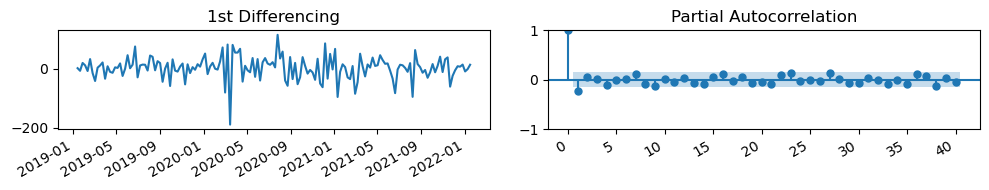

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,2), dpi= 100)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
plot_pacf(df.diff().dropna(), ax=axes[1], lags=40, alpha=0.05, method='ywm')
p = 1

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

### 6. Trouver l’ordre du terme MA(q)

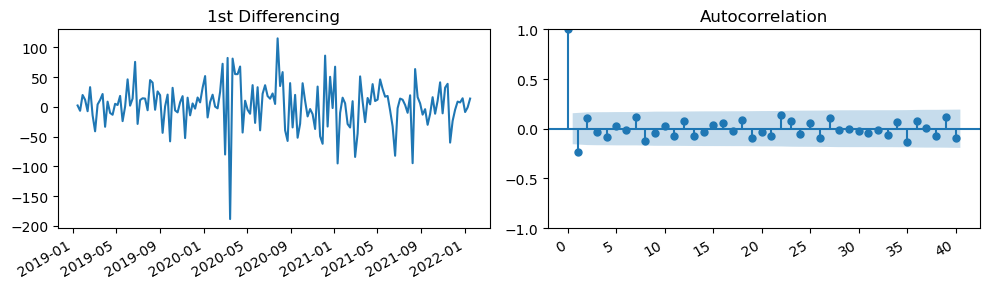

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,3), dpi= 100)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
plot_acf(df.diff().dropna(), ax=axes[1], lags=40, alpha=0.05)
q = 1

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

### 7. Comment gérer si une série chronologique est légèrement sous-différenciée ou sur-différenciée
1. Si la série est légèrement sous-différenciée, l’ajout d’un ou plusieurs termes AR supplémentaires la compense généralement.
2. De même, s’elle est légèrement trop différenciée, essayez d’ajouter un terme MA supplémentaire.

### 8. Choix d’un (de) modèle(s) ARIMA sur la série correctement stationnarisée à l’aide des autocorrélations (simples, partielles) et des critères d’information (AIC et BIC)

In [11]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(df, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          actual_values   No. Observations:                  159
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -797.440
Date:                Fri, 04 Feb 2022   AIC                           1598.879
Time:                        19:17:44   BIC                           1605.004
Sample:                    01-06-2019   HQIC                          1601.367
                         - 01-16-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2274      0.060     -3.812      0.000      -0.344      -0.110
sigma2      1416.4978    114.123     12.412      0.000    1192.821    1640.175
Ljung-Box (L1) (Q):                   0.00   Jarque-

### 9. Tests de validation sur les résidus estimés du modèle ARIMA $(1,1,0)$

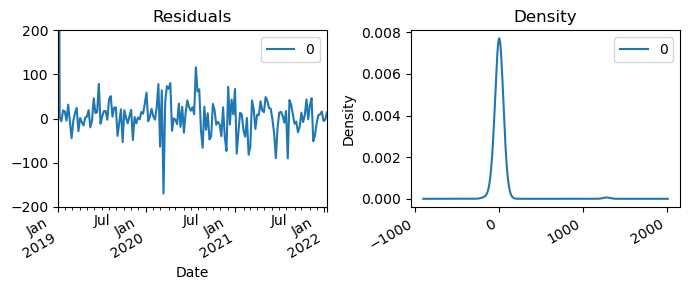

In [12]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(7,3), dpi=100)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
ax[0].set(ylim=(-200,200))

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

D'après les graphe, on constate que:
- Les résidus sont indépendants $\implies$ Absence d’autocorrélation
- Les résidus ont une variance stable $\implies$ Absence d’hétéroscédasticité
- La moyen des résidues égale à 0.
#### A. Absence d’autocorrélation : Test de Ljung-Box

In [13]:
sm.stats.acorr_ljungbox(model_fit.resid, lags=[40], return_df=True)

lb_stat  lb_pvalue
40  3.015435        1.0

Le test de Ljung-Box est un test statistique qui vérifie s'il existe une autocorrélation dans une série temporelle.<br>
${\displaystyle H_{0}}$ : Les résidus sont distribués indépendamment.<br>
${\displaystyle H_{A}}$ : Les résidus ne sont pas distribués indépendamment ; ils présentent une corrélation en série.<br>
Puisque $P_{value} > 0.05$, les résidus de notre modèle de série chronologique sont indépendants. On accepte $H_{0}$.
#### B. Absence d’hétéroscédasticité : Test de Breusch-Pagan

In [14]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

def test_model(col):
    s = []
    for i in col:
        a = [1,i]
        s.append(a)
    return (np.array(s))
df_exog = test_model(df.values)

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, df_exog)

lzip(names, test)

[('Lagrange multiplier statistic', 3.0378448173967825),
 ('p-value', 0.08134384673330246),
 ('f-value', 3.0580600516380625),
 ('f p-value', 0.08229195605546935)]

Le test de Breusch-Pagan vérifie la présence d'homoscédasticité ou hétéroscédasticité.<br>
${\displaystyle H_{0}}$ : L'homoscédasticité est présente.<br>
${\displaystyle H_{A}}$ : L'hétéroscédasticité est présente.<br>
La $P_{value}$ du test de Breush-Pagan indique une valeur de $8.1344$% > $5$%$\implies$ On ne peut pas rejeter $H_{0}$ : l'homoscédasticité est présente. Autrement dit, les résidus sont distribués avec une variance égale.
#### C. Normalité : Test de Jarque Bera

In [15]:
from scipy import stats
stats.jarque_bera(model_fit.resid)

Jarque_beraResult(statistic=96471.8248597976, pvalue=0.0)

Le test de Jarque-Bera teste si les données de l'échantillon ont l'asymétrie et l'aplatissement correspondant à une distribution normale.<br>
${\displaystyle H_{0}}$ : les résidues suivent une loi normale.<br>
${\displaystyle H_{A}}$ : les résidues ne suivent pas une loi normale.<br>
La $P_{value}$ du test de Jarque-Bera indique une valeur de $0$% < $5$%$\implies$ On accepte $H_{A}$ : les résidues ne suivent pas une loi normale.

### 10. Comment interpréter les tracés résiduels dans le modèle ARIMA (Standardized residuals, Distribution of residuals, Q-Q plot & ACF plot)

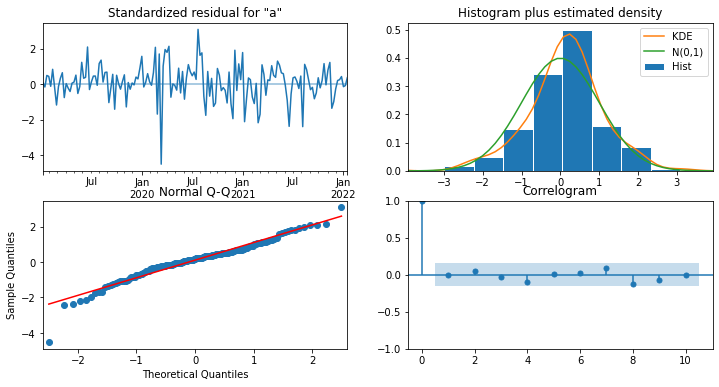

In [16]:
model_fit.plot_diagnostics(figsize=(12,6))

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

1. Résidu standardisé :
    * Les erreurs résiduelles semblent fluctuer autour d'une moyenne de zéro et avoir une variance uniforme.
2. Histogramme plus densité estimée :
    * Le diagramme de densité suggère une distribution normale avec une moyenne nulle.
3. Quantiles théoriques :
    * Tous les points doivent être parfaitement alignés avec la ligne rouge. Tout écart significatif signifierait que la distribution est biaisée.
4. Corrélogramme :
    * Le graphique du corrélogramme, alias ACF, montre que les erreurs résiduelles ne sont pas autocorrélées. Toute autocorrélation impliquerait qu'il existe une certaine tendance dans les erreurs résiduelles qui ne sont pas expliquées dans le modèle. Vous devrez donc rechercher plus de X (prédicteurs) dans le modèle.

### 11. Trouver le modèle ARIMA optimal à l’aide de validation croisée imbriquée de séries chronologiques (Out of-Time Cross validation)

                               SARIMAX Results                                
Dep. Variable:          actual_values   No. Observations:                  120
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -603.126
Date:                Fri, 04 Feb 2022   AIC                           1216.251
Time:                        19:17:46   BIC                           1230.105
Sample:                    01-06-2019   HQIC                          1221.876
                         - 04-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2705      0.168     -7.572      0.000      -1.599      -0.942
ar.L2         -0.2755      0.078     -3.519      0.000      -0.429      -0.122
ma.L1         -0.0002      4.595  -4.73e-05      1.0

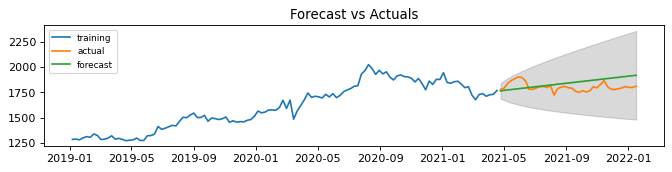

In [17]:
dim = int((len(df)+1)*0.75)
t_dim = len(df)-dim
train = df[:dim]
test = df[dim:]

# Build Model 2,2,2
model = ARIMA(train, order=(2, 2, 2))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast = fitted.get_forecast(t_dim).summary_frame(alpha=0.05) # 95% conf
fc, se = forecast['mean'],forecast['mean_se']

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(forecast['mean_ci_lower'], index=test.index)
upper_series = pd.Series(forecast['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(10,2), dpi=80)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:          actual_values   No. Observations:                  120
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -606.127
Date:                Fri, 04 Feb 2022   AIC                           1216.255
Time:                        19:17:46   BIC                           1221.813
Sample:                    01-06-2019   HQIC                          1218.512
                         - 04-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2681      0.069     -3.905      0.000      -0.403      -0.134
sigma2      1553.8227    146.030     10.640      0.000    1267.610    1840.036
Ljung-Box (L1) (Q):                   0.00   Jarque-

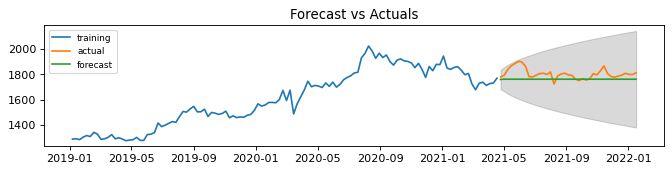

In [18]:
# Build Model 1,1,0 
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast = fitted.get_forecast(t_dim).summary_frame(alpha=0.05) # 95% conf
fc, se = forecast['mean'],forecast['mean_se']

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(forecast['mean_ci_lower'], index=test.index)
upper_series = pd.Series(forecast['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(10,2), dpi=80)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

À l’aide de validation croisée imbriquée, on trouve que les modèle $ARIMA(2,2,2)$ et $ARIMA(1,1,0)$ ont les meilleurs prédicition d'échantillon de test.<br>
En comparant les valeurs d'$AIC$ et les $P(Z>|z|)$ des deux modèles, on déduit que le modèle $ARIMA(1,1,0)$ est l'optimal.<br>

### 12. Mesures de précision pour les prévisions de la série chronologique

In [19]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\yassi\AppData\Local\Temp/ipykernel_4720/2544348089.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\yassi\AppData\Local\Temp/ipykernel_4720/2544348089.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.025169910078545483,
 'me': -43.23697119987288,
 'mae': 46.107445608802415,
 'mpe': -0.02351300242972457,
 'rmse': 58.18416054252167,
 'acf1': 0.6845657545574516,
 'corr': 0.08113461780423395,
 'minmax': 0.025156318592382765}

Environ $2.517$% MAPE implique que le modèle est précis à environ $97.483009$% pour prédire les 39 prochaines observations.

### 13. Calcul de prévisions hors échantillon du 22/01/2022 au 22/02/2022

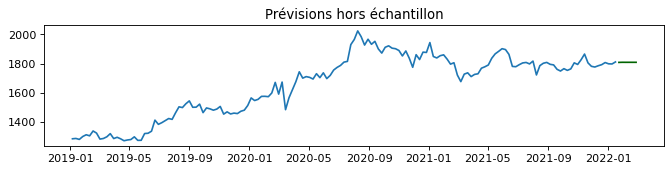

In [20]:
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit()

# Forecast
start_index = '2022-01-22'
end_index = '2022-02-22'
forecast = model_fit.predict(start=start_index, end=end_index)

index_of_fc = forecast.index

# Make series for plotting purpose
fc_series = pd.Series(forecast.values, index=index_of_fc)

# Plot
plt.figure(figsize=(10,2), dpi=80)
plt.plot(df)
plt.plot(fc_series, color='darkgreen')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Prévisions hors échantillon')

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

### 14. Comment faire Auto Arima Forecast en Python

In [21]:
model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1600.627, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1606.147, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1599.011, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1600.209, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1605.321, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1600.536, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1602.535, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1598.879, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1600.193, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1600.370, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1600.130, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1602.183, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.658 seconds
                               SARIMAX Results                                
Dep. Vari